<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/take-home-exam/Take_home_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take Home Exam

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Task-1


In [19]:
synthetic_data = pd.read_csv('synthetic_dataset.csv')
synthetic_data_val = pd.read_csv('synthetic_test_dataset.csv')

In [20]:
# extracting x1,x2 as X, and y as y
X_train = synthetic_data[['x1', 'x2']].values
y_train = synthetic_data['y'].values
X_val = synthetic_data_val[['x1', 'x2']].values
y_val = synthetic_data_val['y'].values

In [21]:
X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val_with_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]

In [22]:
XTX = np.dot(X_train_with_bias.T, X_train_with_bias)
print(XTX)

[[  50.           -2.88694571  -19.63498323]
 [  -2.88694571 1876.75335074 -137.8854133 ]
 [ -19.63498323 -137.8854133  1535.2500828 ]]


In [23]:
XTX_inv = np.linalg.inv(XTX)
print(XTX_inv)

[[2.01056432e-02 5.01508615e-05 2.61644043e-04]
 [5.01508615e-05 5.36499471e-04 4.88260274e-05]
 [2.61644043e-04 4.88260274e-05 6.59091170e-04]]


In [24]:
XTy = np.dot(X_train_with_bias.T, y_train)
print(XTy)

[ 0.         97.04334917 42.61231321]


In [25]:
#final weight matrix
coefficients = np.dot(XTX_inv, XTy)
print(coefficients)

[0.01601607 0.0541443  0.03282364]


In [26]:
x1_range = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)
x2_range = np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100)
x1_values, x2_values = np.meshgrid(x1_range, x2_range)
X_boundary = np.c_[np.ones(x1_values.ravel().shape[0]), x1_values.ravel(), x2_values.ravel()]
decision_boundary = np.dot(X_boundary, XTy)
decision_boundary = decision_boundary.reshape(x1_values.shape)



<ipython-input-27-f3d1d1abf345>:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_values, x2_values, decision_boundary, levels=[0], label='Decision Boundary')


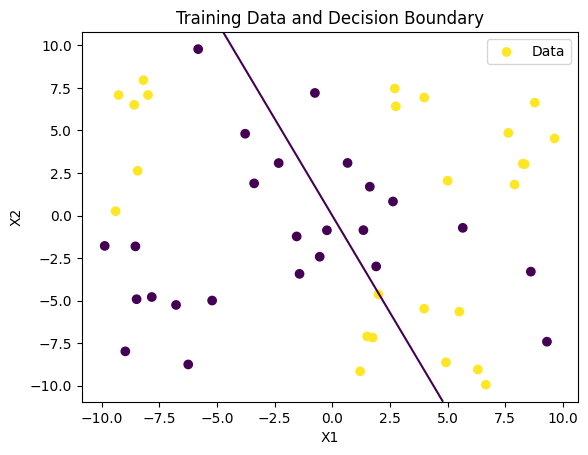

In [27]:
#plotting decision boundary from obtained weights
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Data')
plt.contour(x1_values, x2_values, decision_boundary, levels=[0], label='Decision Boundary')

plt.title('Training Data and Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [28]:
y_train_pred = np.dot(X_train_with_bias, coefficients)
y_val_pred = np.dot(X_val_with_bias, coefficients)
y_train_pred_sign = np.sign(y_train_pred)
y_val_pred_sign = np.sign(y_val_pred)
#print(y_train_pred)
count = 0

train_error = mean_squared_error(y_train_pred, y_train)
print(f"Training Error (MSE): {train_error}")

y_val_pred = np.dot(X_val_with_bias, coefficients)
val_error = mean_squared_error(y_val, y_val_pred)
print(f"Validation Error (MSE): {val_error}")

Training Error (MSE): 0.8669392995099426
Validation Error (MSE): 0.844018025552504


In [29]:
for i in range(len(y_train_pred)):
  if y_train_pred_sign[i] != y_train[0]:
    count +=1
print("train misclassified error:",count/len(y_train_pred))

for i in range(len(y_val_pred)):
  if y_val_pred_sign[i] != y_train[0]:
    count +=1
print("validation misclassified error:",count/len(y_val_pred))

train misclassified error: 0.5
validation misclassified error: 0.532


In [30]:
def plot_results(X, y, y_pred, title):
    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Model Prediction')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [31]:
def plot_decision_boundary(polynomial_order, X_train, y_train, X_val, y_val, model):
    poly_features = PolynomialFeatures(degree=polynomial_order)
    X_val_poly = poly_features.fit_transform(X_val)
    y_val_pred = model.predict(X_val_poly)

#defining the space
    x1_range = np.linspace(X_val[:, 0].min() - 1, X_val[:, 0].max() + 1, 100)
    x2_range = np.linspace(X_val[:, 1].min() - 1, X_val[:, 1].max() + 1, 100)
    x1_values, x2_values = np.meshgrid(x1_range, x2_range)
    X_boundary_poly = poly_features.transform(np.c_[x1_values.ravel(), x2_values.ravel()])


#Decision boundary
    decision_boundary = model.predict(X_boundary_poly)
    decision_boundary = decision_boundary.reshape(x1_values.shape)

#plotting part
    plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='viridis', edgecolors='k', marker='o', label='Data')
    plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {polynomial_order})')

    plt.title(f'Validation Data and Decision Boundary (Polynomial Order {polynomial_order})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

In [32]:
def polyfeatures(order):
  poly_features = PolynomialFeatures(degree=order)

  X_train_poly = poly_features.fit_transform(X_train)
  X_val_poly = poly_features.transform(X_val)

  model_order = LinearRegression()
  model_order.fit(X_train_poly, y_train)
  y_train_pred_order = model_order.predict(X_train_poly)
  y_val_pred_order = model_order.predict(X_val_poly)

  train_error_order = mean_squared_error(y_train, y_train_pred_order)
  val_error_order = mean_squared_error(y_val, y_val_pred_order)
  return train_error_order,val_error_order,model_order

Polynomial Order: 2
Training Error: 0.6712559029286338
Validation Error: 0.752793662214335



<ipython-input-31-b6907e6fff57>:19: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {polynomial_order})')


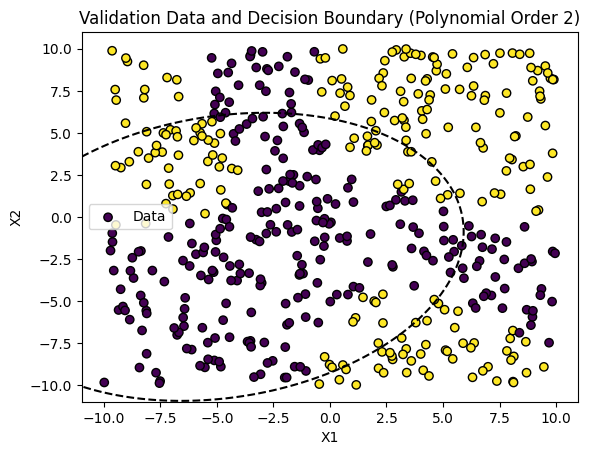

In [33]:
train_error_order_2,val_error_order_2,model_order_2 = polyfeatures(2)
print("Polynomial Order: 2")
print(f"Training Error: {train_error_order_2}")
print(f"Validation Error: {val_error_order_2}")
print()
plot_decision_boundary(2, X_train, y_train, X_val, y_val, model_order_2)

Polynomial Order: 3
Training Error: 0.2536236701886392
Validation Error: 0.6867549907072039



<ipython-input-31-b6907e6fff57>:19: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {polynomial_order})')


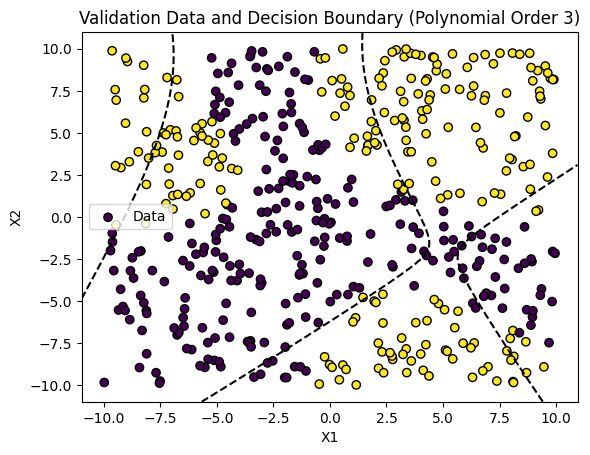

In [34]:
train_error_order_3,val_error_order_3,model_order_3 = polyfeatures(3)
print("Polynomial Order: 3")
print(f"Training Error: {train_error_order_3}")
print(f"Validation Error: {val_error_order_3}")
print()
plot_decision_boundary(3, X_train, y_train, X_val, y_val, model_order_3)

Polynomial Order: 4
Training Error: 0.1737045044469892
Validation Error: 0.5697646871091975



<ipython-input-31-b6907e6fff57>:19: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {polynomial_order})')


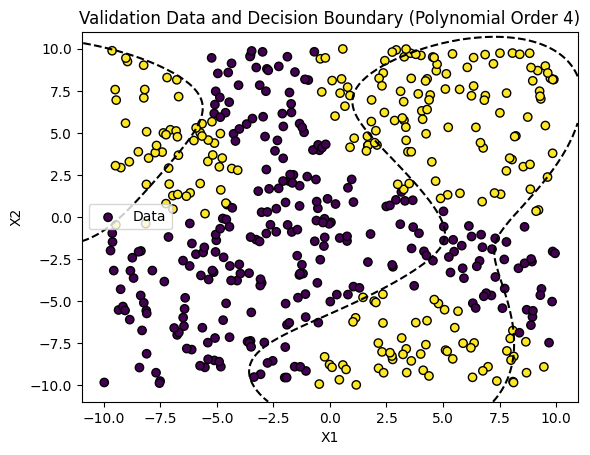

In [35]:
train_error_order_4,val_error_order_4,model_order_4 = polyfeatures(4)
print("Polynomial Order: 4")
print(f"Training Error: {train_error_order_4}")
print(f"Validation Error: {val_error_order_4}")
print()
plot_decision_boundary(4, X_train, y_train, X_val, y_val, model_order_4)

In [58]:
print("Linear regression")
print(f"Training Error: {train_error}")
print(f"Validation Error: {val_error}")
print()
print("Polynomial Order: 2")
print(f"Training Error: {train_error_order_2}")
print(f"Validation Error: {val_error_order_2}")
print()
print("Polynomial Order: 3")
print(f"Training Error: {train_error_order_3}")
print(f"Validation Error: {val_error_order_3}")
print()
print("Polynomial Order: 4")
print(f"Training Error: {train_error_order_4}")
print(f"Validation Error: {val_error_order_4}")

Linear regression
Training Error: 0.8669392995099426
Validation Error: 0.844018025552504

Polynomial Order: 2
Training Error: 0.6712559029286338
Validation Error: 0.752793662214335

Polynomial Order: 3
Training Error: 0.2536236701886392
Validation Error: 0.6867549907072039

Polynomial Order: 4
Training Error: 0.1737045044469892
Validation Error: 0.5697646871091975


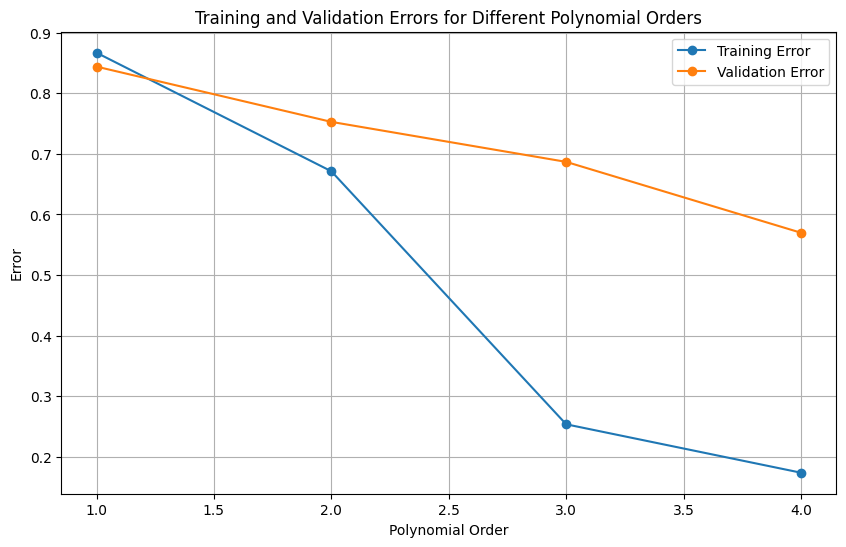

In [62]:
train_errors = [train_error, train_error_order_2, train_error_order_3, train_error_order_4]
val_errors = [val_error, val_error_order_2, val_error_order_3, val_error_order_4]
orders = [1, 2, 3, 4]
plt.figure(figsize=(10, 6))
plt.plot(orders, train_errors, marker='o', label='Training Error')
plt.plot(orders, val_errors, marker='o', label='Validation Error')
plt.title('Training and Validation Errors for Different Polynomial Orders')
plt.xlabel('Polynomial Order')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


The training and testing error seems to decrease as we increase the polynomial order. For this data, order 4 has the lowest training and validation error and we should pick this. Degree 1 has the highest training and validation error, which probably implies that the simpler model is underfitting heavily. As we increase the complexity of the model, the obtained g(x) is also more complex, and a complex model seems to fit much better for this data.

# Task-2

In [36]:
Cancer_data = pd.read_csv('breast_cancer_dataset_preprocessed.csv')
X = Cancer_data.drop('y', axis=1)
y = Cancer_data['y']


In [37]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,4.147954,-4.443183,-0.068966,4.035033,0.817574,-0.476277,0.553593,1.268819
1,-4.595154,-2.684882,1.084110,-0.403925,0.410287,0.687051,0.284184,0.260968
2,-0.755349,-2.318373,-1.938275,0.279953,0.241712,3.409801,0.092694,1.040391
3,-0.453863,0.197572,-1.037060,0.344384,0.070598,-0.822546,-0.993352,-0.946259
4,-3.278680,-0.792025,-0.736833,-1.621295,-0.085459,-0.824324,-0.107042,-0.291755


In [38]:
y.head()

0    M
1    B
2    M
3    B
4    B
Name: y, dtype: object

In [39]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=487)

I am using a Multi-Layer Perceptron (MLP) neural network for classification, utilizing the scikit-learn library. The model was trained on the training data and evaluated on both training and testing sets. The performance metric is accuracy, providing an overall assessment of the model's correctness.

In [46]:
nn_clf = MLPClassifier()
nn_clf.fit(X_train, y_train)
nn_train_accuracy = nn_clf.score(X_train, y_train)
nn_test_accuracy = nn_clf.score(X_test, y_test)
print("Neural Network - Train Accuracy:", nn_train_accuracy, "Test Accuracy:", nn_test_accuracy)

Neural Network - Train Accuracy: 0.993421052631579 Test Accuracy: 0.948051948051948


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Next we use a linear Support Vector Machine (SVM). The data was standardized using the StandardScaler to enhance SVM performance.



In [43]:
linear_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=487))
linear_svm_clf.fit(X_train, y_train)
linear_svm_train_accuracy = linear_svm_clf.score(X_train, y_train)
linear_svm_test_accuracy = linear_svm_clf.score(X_test, y_test)


Support Vector Machine with polynomial kernel of degree 3

In [50]:
poly_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, random_state=487))
poly_svm_clf.fit(X_train, y_train)
poly_svm_train_accuracy = poly_svm_clf.score(X_train, y_train)
poly_svm_test_accuracy = poly_svm_clf.score(X_test, y_test)

Support vector machine with an RBF kernel

In [47]:
rbf_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=487))
rbf_svm_clf.fit(X_train, y_train)
rbf_svm_train_accuracy = rbf_svm_clf.score(X_train, y_train)
rbf_svm_test_accuracy = rbf_svm_clf.score(X_test, y_test)

Next Random Forest classifier was employed, utilizing an ensemble of decision trees

In [48]:
rf_clf = RandomForestClassifier(random_state=487)
rf_clf.fit(X_train, y_train)
rf_train_accuracy = rf_clf.score(X_train, y_train)
rf_test_accuracy = rf_clf.score(X_test, y_test)

In [51]:
nn_predictions = nn_clf.predict(X_test)
linear_svm_predictions = linear_svm_clf.predict(X_test)
poly_svm_predictions = poly_svm_clf.predict(X_test)
rbf_svm_predictions = rbf_svm_clf.predict(X_test)
rf_predictions = rf_clf.predict(X_test)

In [53]:
print("Neural Network - Train Accuracy:", nn_train_accuracy, "Test Accuracy:", nn_test_accuracy)
print("Linear SVM - Train Accuracy:", linear_svm_train_accuracy, "Test Accuracy:", linear_svm_test_accuracy)
print("Poly SVM (Degree 3) - Train Accuracy:", poly_svm_train_accuracy, "Test Accuracy:", poly_svm_test_accuracy)
print("RBF SVM - Train Accuracy:", rbf_svm_train_accuracy, "Test Accuracy:", rbf_svm_test_accuracy)
print("Random Forest - Train Accuracy:", rf_train_accuracy, "Test Accuracy:", rf_test_accuracy)

Neural Network - Train Accuracy: 0.993421052631579 Test Accuracy: 0.948051948051948
Linear SVM - Train Accuracy: 0.9802631578947368 Test Accuracy: 0.935064935064935
Poly SVM (Degree 3) - Train Accuracy: 0.9013157894736842 Test Accuracy: 0.8701298701298701
RBF SVM - Train Accuracy: 0.9802631578947368 Test Accuracy: 0.922077922077922
Random Forest - Train Accuracy: 1.0 Test Accuracy: 0.8961038961038961


The best accuracy is shown by the Neural Network.

In [63]:
nn_report = classification_report(y_test, nn_predictions)
linear_svm_report = classification_report(y_test, linear_svm_predictions)
poly_svm_report = classification_report(y_test, poly_svm_predictions)
rbf_svm_report = classification_report(y_test, rbf_svm_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("\nClassification Reports:")
print("Neural Network:\n", nn_report)
print("Linear SVM:\n", linear_svm_report)
print("Poly SVM (Degree 3):\n", poly_svm_report)
print("RBF SVM:\n", rbf_svm_report)
print("Random Forest:\n", rf_report)


Classification Reports:
Neural Network:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.96      0.90      0.93        29

    accuracy                           0.95        77
   macro avg       0.95      0.94      0.94        77
weighted avg       0.95      0.95      0.95        77

Linear SVM:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.96      0.86      0.91        29

    accuracy                           0.94        77
   macro avg       0.94      0.92      0.93        77
weighted avg       0.94      0.94      0.93        77

Poly SVM (Degree 3):
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        48
           1       1.00      0.66      0.79        29

    accuracy                           0.87        77
   macro avg       0.91      0.83      0.85        

F1 Score is a metric that calculates the harmonic mean between precision and recall in classification tasks. Precision measures the accuracy of positive predictions, it is given by the ratio of true positive predictions to the total predicted positives.Recall assesses the model's ability to capture all positive instances and is given by the ratio of true positive predictions to the total actual positives. The F1 Score is defined as the harmonic mean of precision and recall.

This F-1 score penalizes extreme values basically, which means it provides a comprehensive measure of a model's ability to balance false positives and false negatives. A higher F1 Score signifies a more robust model that effectively navigates the trade-off between precision and recall. The F-1 score for the neural network is the best with a weighted average of 0.95. The polynomial SVM perfomrms the worst with a weighted average of 0.86. Random Forest performs decently well with an accuracy of 0.90. Random Forest, is based on decision trees and can handle complex relationships between features and target variables, and provides robustness against overfitting.

The highest accuracy is for Neural networks and can be the model of choice for this problem.








Discussed with Rajat, Gauri and Somesh